#### Problem Statement
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:/Users/Hrushikesh/Desktop/dataset1-master/census_income.csv")
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


The dataset contains the information of 51 state samples of US population. The dataset contains 15 columns including the features and target variables here income column is the label which is less than or greater than 50k depending on various features.

In [3]:
data.shape

(32560, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

#### Categorical Columns-
- Workclass
- Education
- Material_status
- Occupation
- Relationship
- Race
- Sex
- Native_country
- Income

#### Numerical Columns - 
- Age
- Fnlwgt
- Education_num
- Capital_gain
- Capital_loss
- Hours_per_week

#### So , out of  columns, 6 have numerical data and 9 have categorical data

In [6]:
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [7]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

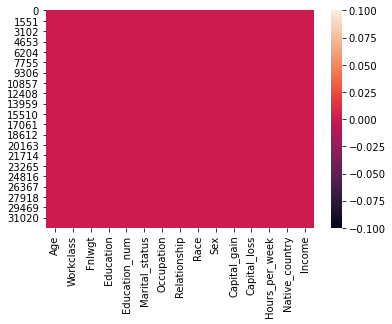

In [8]:
sns.heatmap(data.isnull())

We can get a clear visualization of no null data.

# Value Counts 

In [10]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

Here we can see the columns having question marks our work class occupation native country and they all are categorical variables. So we can fill them with most frequently occurring values of the respective column that is mode value

In [11]:
data['Workclass'] = data.Workclass.str.replace('?','Private')
data['Occupation'] = data.Occupation.str.replace('?','Prof-specialty')
data['Native_country'] = data.Native_country.str.replace('?','United-States')

In [12]:
for i in data[['Workclass','Occupation','Native_country']]:
    print(data[i].value_counts())
    print("\n")

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England

In [13]:
data.drop("Capital_gain",axis=1,inplace=True)
data.drop("Capital_loss",axis=1,inplace=True)

In [14]:
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [15]:
data.loc[data['Income']==" "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income


There is no spaces in the dataset

In [16]:
data.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect as there is no negative/invalid values present. From the above description we can observe the following things.

- The count of the columns are same which means there is no missing values present in any column
- The mean is greater than median in some columns which means they are skewed to the right.
- The mean and median are almost equal in Education_num and Hours_per_week which means the data is symmetric in these columns hence the data is normal and no skewness present here.
- There is huge difference in 75% and max it shows that hugs outliers are present in the columns.
- In summarizing the data we can obsserve that the dataset contains the persons age between 17 years to 90 years.

In [17]:
# Checking for Categirical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [18]:
# Checking for Numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


# Data Visualization


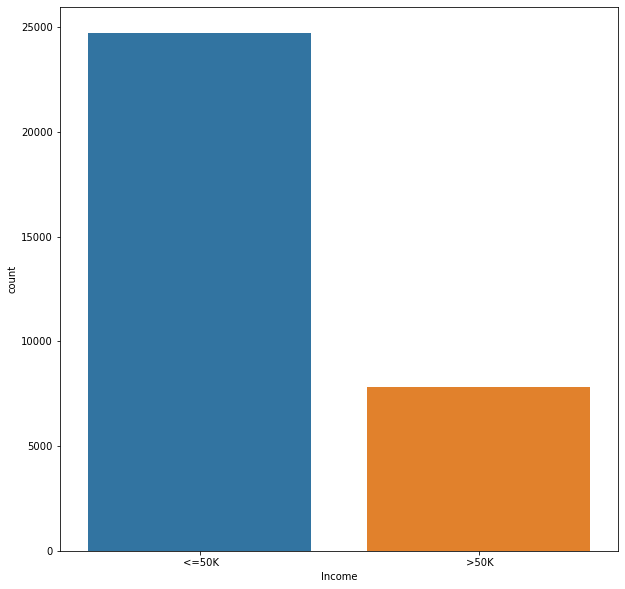

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(data['Income'])
plt.show()

Most of the people have the income less than or equal to 50k. We can also observe the class is imbalanced and hence needs to balance it before model building.

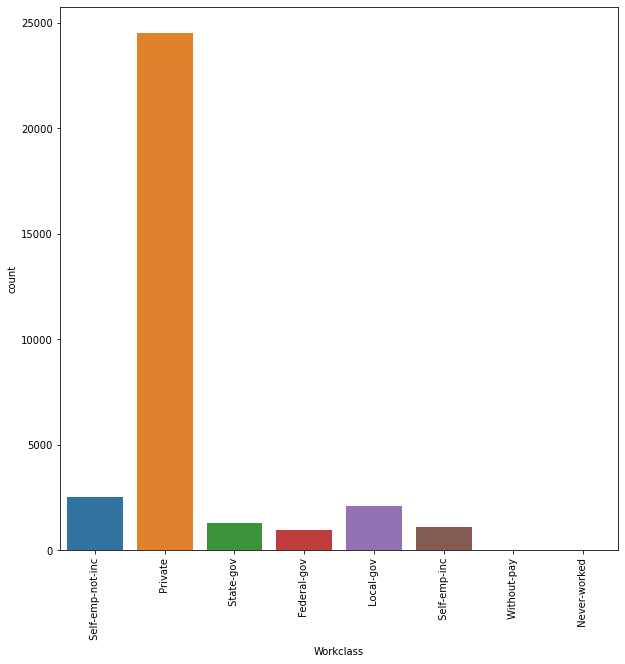

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(data['Workclass'])
plt.xticks(rotation=90)
plt.show()

We can see the count of private workclass is high comapare to others. This means the people working in the private sectors are more than the people working in the other sector.

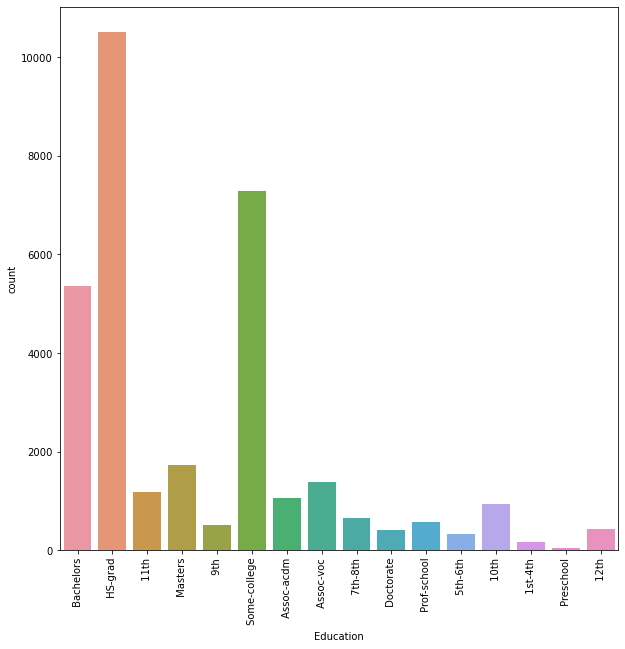

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(data['Education'])
plt.xticks(rotation=90)
plt.show()

The conut of HS-grad is high than others and the count is more than 10K

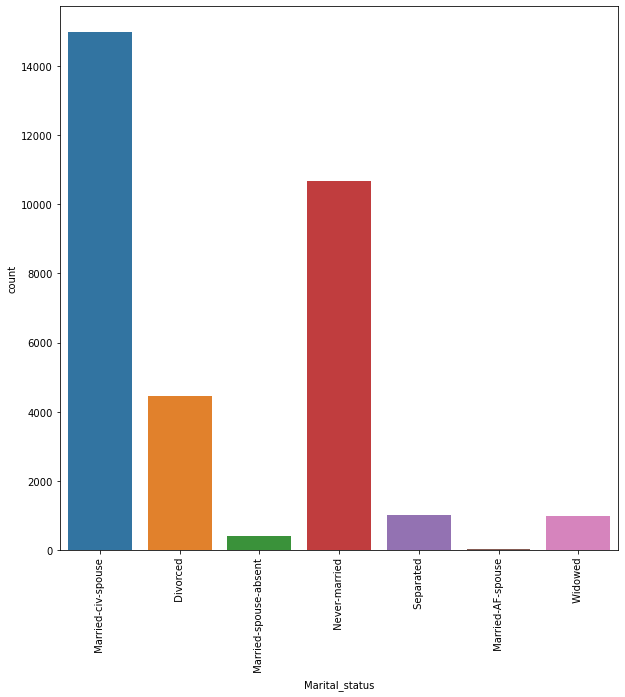

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(data['Marital_status'])
plt.xticks(rotation=90)
plt.show()

The people who got married have high counts.

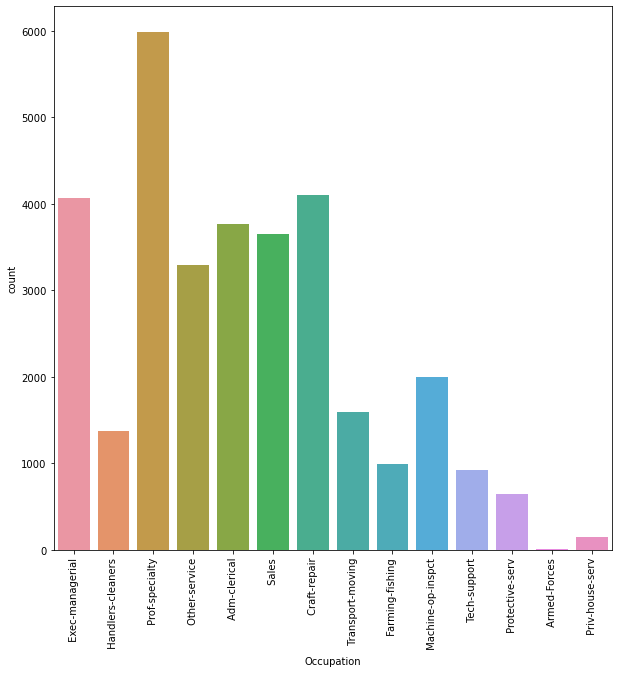

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(data['Occupation'])
plt.xticks(rotation=90)
plt.show()

The people who are in the position of Pro-speciality have highest count and the people who are in the position of Armed-Forces have very least counts.

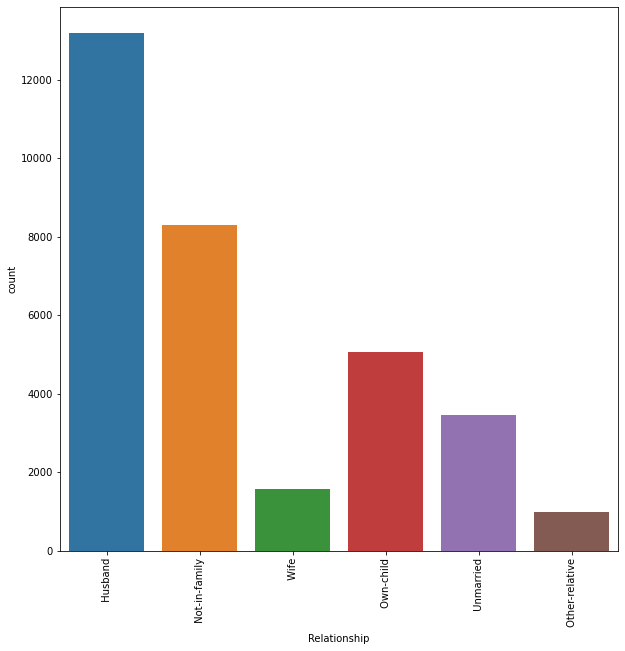

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(data['Relationship'])
plt.xticks(rotation=90)
plt.show()

The count is high for the Husbond category

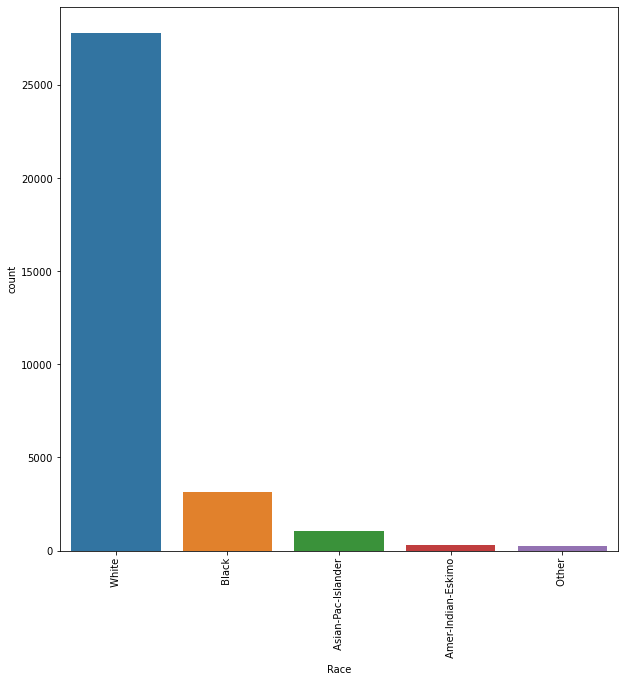

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(data['Race'])
plt.xticks(rotation=90)
plt.show()

White family groups have high count

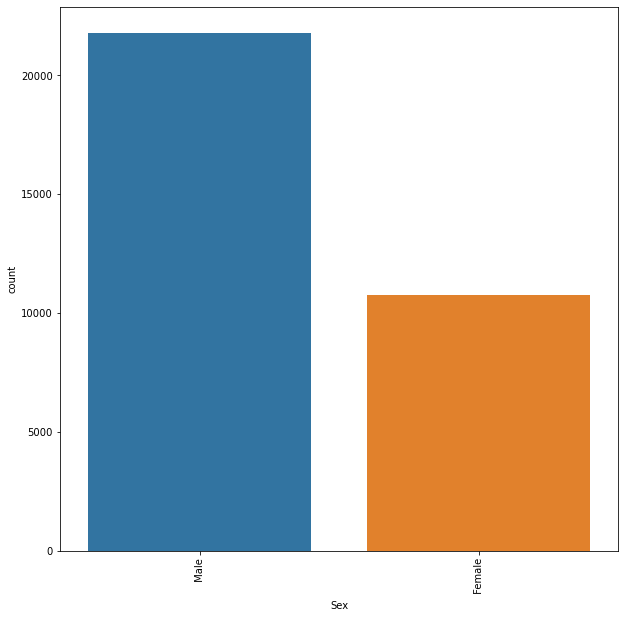

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(data['Sex'])
plt.xticks(rotation=90)
plt.show()

The count of Male is high rather than the count of females.

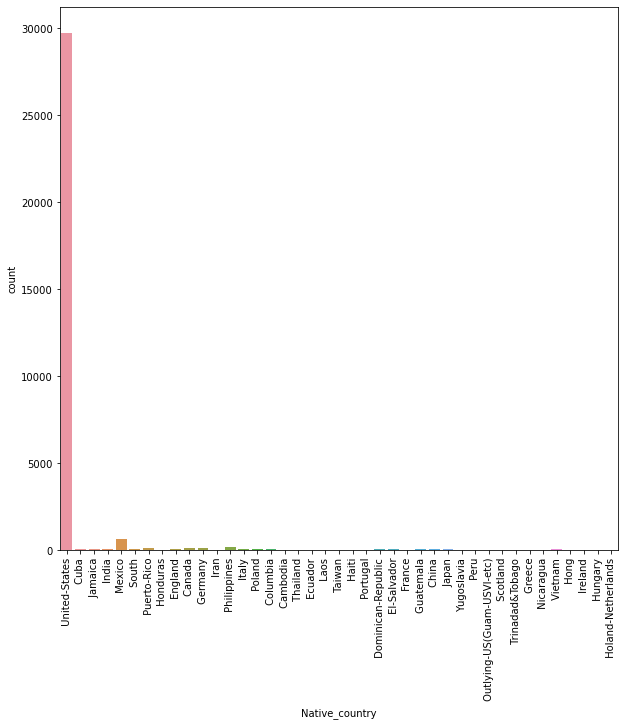

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(data['Native_country'])
plt.xticks(rotation=90)
plt.show()

The united states country has the highest count and other countries have very less count

# Distribution of Data

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

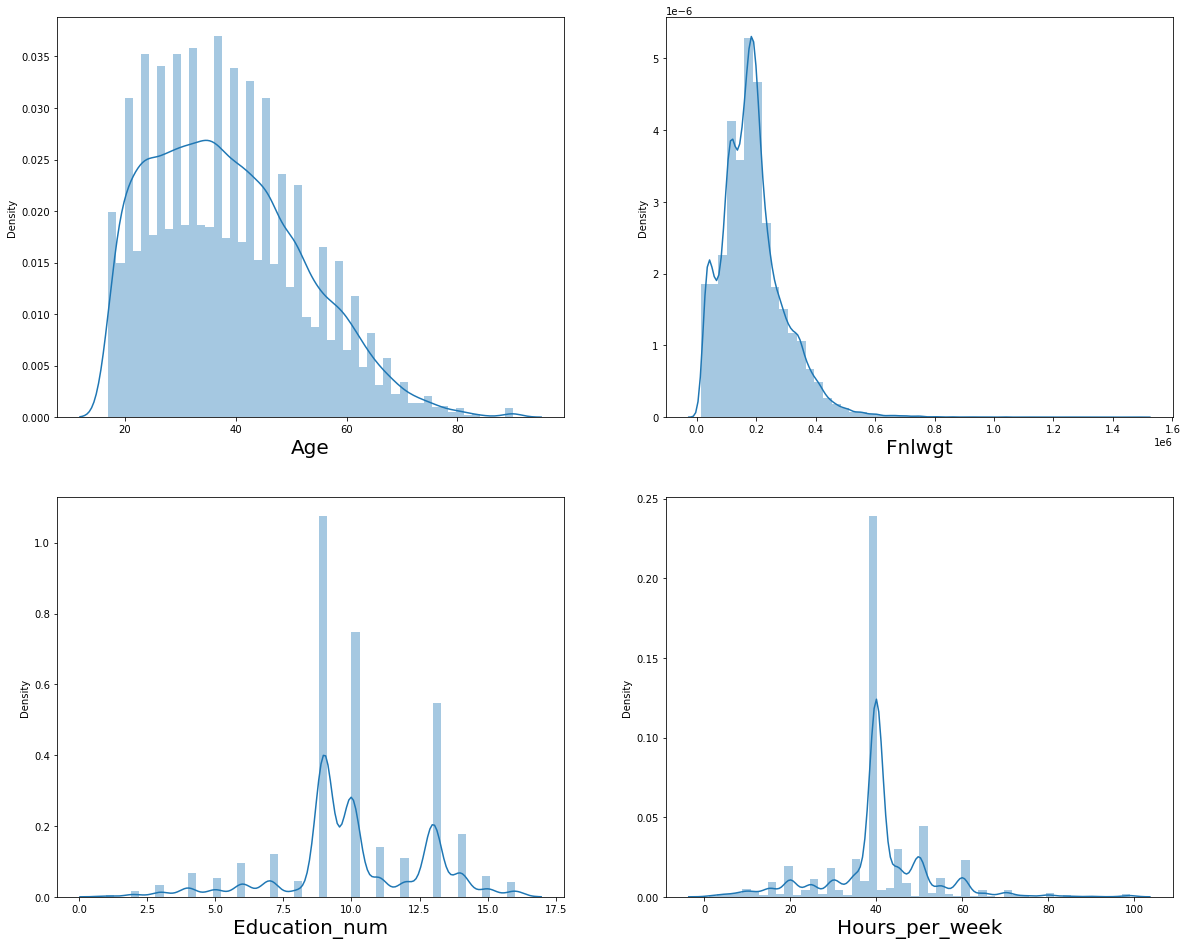

In [28]:
# Distribution of skewness
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout

- From the above distribution plot it van be inferred that the Age column seems to be normal but the mean is more than the median so it is rightly skewed.
- The data is not normal in above columns and also skewness is present

<Figure size 720x720 with 0 Axes>

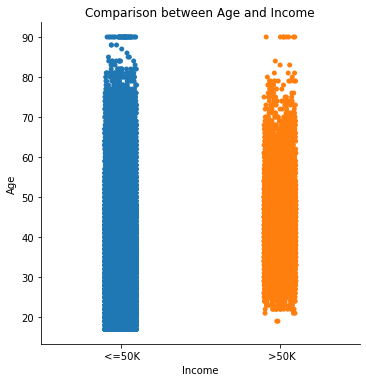

In [29]:
# Visualization of Age and Income
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Age', data=data,kind='strip')
plt.title("Comparison between Age and Income")
plt.show()


<Figure size 720x720 with 0 Axes>

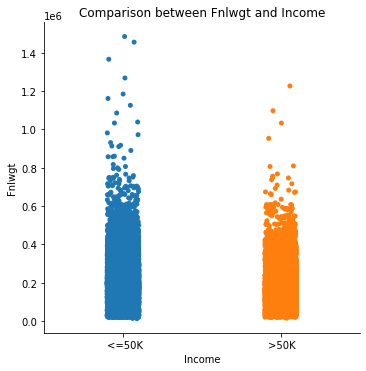

In [30]:
# Visualization of Fianl Weight and Income
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Fnlwgt', data=data,kind='strip')
plt.title("Comparison between Fnlwgt and Income")
plt.show()


There is no significance between final weight and income

<Figure size 720x720 with 0 Axes>

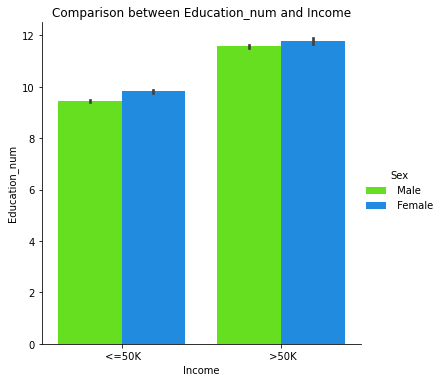

In [31]:
# Visualization of Education and Income
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Education_num',hue="Sex",data=data,kind='bar',palette="gist_rainbow")
plt.title("Comparison between Education_num and Income")
plt.show()

The income is more than 50K for the people having high education number. Here both gender have high income more thaan 50K

<Figure size 720x720 with 0 Axes>

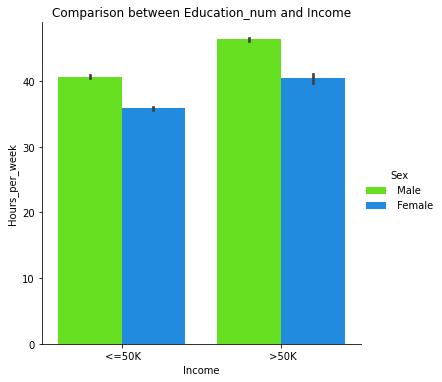

In [32]:
# Visualization of Number of Hours per Week and Income
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Hours_per_week',hue="Sex",data=data,kind='bar',palette="gist_rainbow")
plt.title("Comparison between Education_num and Income")
plt.show()

This shows how the income is related to the hours per week. The income is >=50K when the hours is high for both male and female.

 # Outliers
 

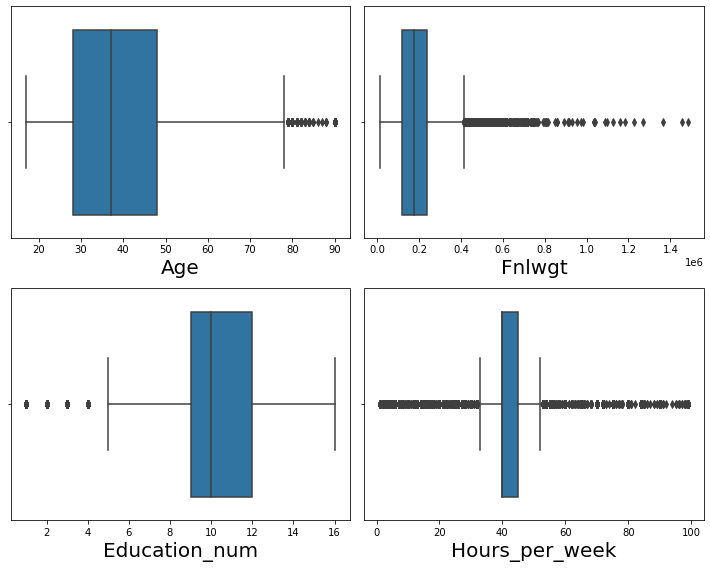

In [33]:
plt.figure(figsize=(10,8), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can see that all columns have outliers present.

In [34]:
from scipy.stats import zscore
features = data[['Age','Fnlwgt','Education_num','Hours_per_week']]
z = np.abs(zscore(features))
z

array([[0.83709708, 1.0087417 , 1.13477863, 2.22212013],
       [0.04264043, 0.24504633, 0.42002663, 0.03542999],
       [1.05703146, 0.42576955, 1.19742926, 0.03542999],
       ...,
       [1.42358875, 0.3588108 , 0.42002663, 0.03542999],
       [1.21562378, 0.11092744, 0.42002663, 1.65520046],
       [0.98372   , 0.92986178, 0.42002663, 0.03542999]])

In [35]:
new_data = data[(z<3).all(axis=1)]
new_data


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [36]:
print(data.shape)
print(new_data.shape)

(32560, 13)
(31461, 13)


In [37]:
loss = (32560-31461)/32560*100
loss

3.3753071253071254

Here we are loosing only 3% data

# IQR

In [38]:
# 1st quantile
Q1 = features.quantile(0.25)

# 3rd Quantile
Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1

data1 = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]


In [39]:
data1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


In [40]:
print(data.shape)
print(data1.shape)

(32560, 13)
(21950, 13)


In [41]:
loss = (32560-21950)/32560*100
loss

32.58599508599509

Using IQR we loss 32% data, So we will consider zscore method

# Skewness

In [42]:
new_data.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

As we can see there is skewness in Fnlwgt column. 

In [43]:
new_data['Fnlwgt'] = np.cbrt(data['Fnlwgt'])
new_data.skew()

Age               0.472279
Fnlwgt           -0.376609
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

 # Encoding 

In [44]:
from sklearn.preprocessing import LabelEncoder
categorical_col = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
lbl = LabelEncoder()
new_data[categorical_col]=new_data[categorical_col].apply(lbl.fit_transform)

In [45]:
new_data[categorical_col]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,5,8,2,3,0,4,1,38,0
1,3,10,0,5,1,4,1,38,0
2,3,1,2,5,0,2,1,38,0
3,3,8,2,9,5,2,0,4,0
4,3,11,2,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,3,6,2,12,5,4,0,38,0
32556,3,10,2,6,0,4,1,38,1
32557,3,10,6,0,4,4,0,38,0
32558,3,10,4,0,3,4,1,38,0


# Correlation

In [46]:
corr = new_data.corr()
corr

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.038024,-0.062328,-0.000447,0.053361,-0.286424,-0.001321,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,0.038024,1.000000,-0.021663,0.004652,0.003831,-0.020597,0.007551,-0.056825,0.046295,0.070095,0.030311,-0.001602,0.003494
Fnlwgt,-0.062328,-0.021663,1.000000,-0.024056,-0.031874,0.026902,0.001524,0.009060,-0.006959,0.023307,-0.015820,-0.061390,-0.002780
Education,-0.000447,0.004652,-0.024056,1.000000,0.356040,-0.039094,-0.041224,-0.015121,0.015552,-0.024911,0.061325,0.068374,0.077526
Education_num,0.053361,0.003831,-0.031874,0.356040,1.000000,-0.065568,0.073927,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.286424,-0.020597,0.026902,-0.039094,-0.065568,1.000000,0.034640,0.185772,-0.067546,-0.127375,-0.197532,-0.017606,-0.198475
Occupation,-0.001321,0.007551,0.001524,-0.041224,0.073927,0.034640,1.000000,-0.037549,-0.004094,0.047864,-0.019943,-0.003666,0.034612
Relationship,-0.268028,-0.056825,0.009060,-0.015121,-0.102497,0.185772,-0.037549,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.046295,-0.006959,0.015552,0.030849,-0.067546,-0.004094,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.070095,0.023307,-0.024911,0.016662,-0.127375,0.047864,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


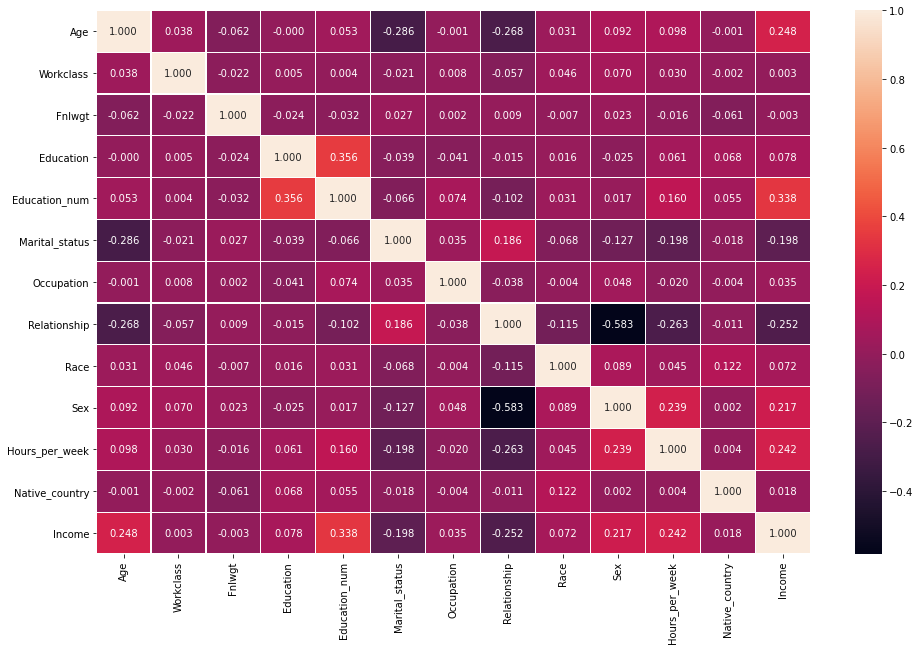

In [48]:
plt.figure(figsize=(16,10))
sns.heatmap(new_data.corr(),linewidths=.1,fmt="0.3f",annot=True)
plt.show()

This heatmap shows the correlation matrix by visualising the data. We can observe the relation between one features to another.
- this heat map contains both positive and negative correlation
- there is no much correlation between target and the label
- the column education_num, age, sex, and hours_per_week have positive correlation with label.
- the columns relationship and sex are highly correlated with each other also other column FNLWGT has very less correlation with labels so we can drop these columns
- there is no multicollinearity issue exists in the data


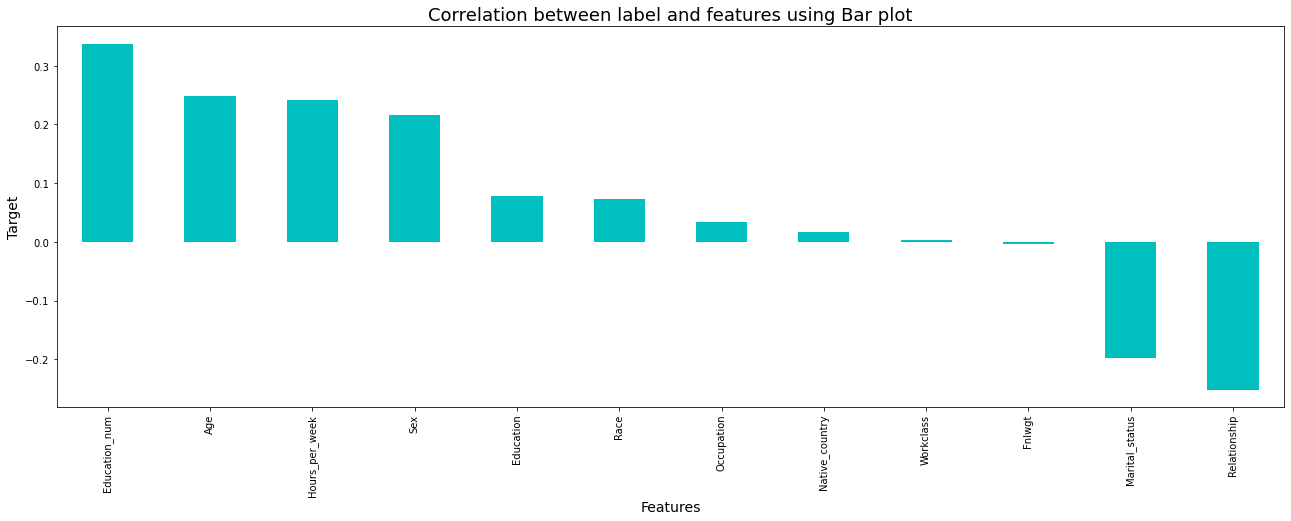

In [50]:
plt.figure(figsize=(22,7))
new_data.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and features using Bar plot', fontsize=18)
plt.show()

The column fnlwgt and workclass hass very less relation with the label, so we can drop these columns if necessary

# Separating Features And Labels

In [51]:
x = new_data.drop("Income",axis=1)
y = new_data["Income"]

In [52]:
x.shape

(31461, 12)

In [53]:
y.shape

(31461,)

# Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,1.722723,-1.102052,-0.348344,1.154324,-0.403597,-0.784335,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,-0.080441,0.464976,0.245782,-0.459657,-1.733114,-0.282327,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,-0.080441,0.630260,-2.427783,-1.266647,-0.403597,-0.282327,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,-0.080441,1.399791,-0.348344,1.154324,-0.403597,0.721690,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,-0.080441,1.023711,0.542845,1.557819,-0.403597,-0.784335,2.203019,0.391304,-1.415226,-0.008364,0.254062
...,...,...,...,...,...,...,...,...,...,...,...,...
31456,-0.850723,-0.080441,0.814728,-0.942469,0.750829,-0.403597,1.474703,2.203019,0.391304,-1.415226,-0.187309,0.254062
31457,0.124718,-0.080441,-0.143169,0.245782,-0.459657,-0.403597,-0.031323,-0.903178,0.391304,0.706601,-0.008364,0.254062
31458,1.475327,-0.080441,-0.170768,0.245782,-0.459657,2.255438,-1.537348,1.581780,0.391304,-1.415226,-0.008364,0.254062
31459,-1.225892,-0.080441,0.335900,0.245782,-0.459657,0.925921,-1.537348,0.960541,0.391304,0.706601,-1.797814,0.254062


In [55]:
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

Here we can notice that the class has imbalance

# Oversampling

In [56]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [57]:
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

The data is balanced now

In [58]:
new_data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,43.675121,8,13,2,3,0,4,1,13,38,0
1,38,3,59.967204,10,9,0,5,1,4,1,40,38,0
2,53,3,61.685627,1,7,2,5,0,2,1,40,38,0
3,28,3,69.686283,8,13,2,9,5,2,0,40,4,0
4,37,3,65.776255,11,14,2,3,5,4,0,40,38,0


# Modeling

In [60]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
maxAccu = 0
maxRS = 0
for i in range(0,200):
    x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=i)
    DT = DecisionTreeClassifier()
    DT.fit(x_train,y_train)
    pred = DT.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("The best Accuracy is", maxAccu,"at random state",maxRS)

The best Accuracy is 0.8381078814980436 at random state 35


# Creating train_test_split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=35)


In [63]:
!pip3 install xgboost

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7586640581330352
[[5276 1858]
 [1596 5582]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      7134
           1       0.75      0.78      0.76      7178

    accuracy                           0.76     14312
   macro avg       0.76      0.76      0.76     14312
weighted avg       0.76      0.76      0.76     14312



The Accuracy Score using Logistic Regression is 75.86%

# DecisionTree

In [67]:

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8377585243152599
[[5984 1150]
 [1172 6006]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7134
           1       0.84      0.84      0.84      7178

    accuracy                           0.84     14312
   macro avg       0.84      0.84      0.84     14312
weighted avg       0.84      0.84      0.84     14312



The accuracy score using DecisionTree is 83.77%


# RandomForestClassifier

In [68]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test,predRF))
print(confusion_matrix(y_test,predRF))
print(classification_report(y_test,predRF))

0.8833147009502516
[[6190  944]
 [ 726 6452]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      7134
           1       0.87      0.90      0.89      7178

    accuracy                           0.88     14312
   macro avg       0.88      0.88      0.88     14312
weighted avg       0.88      0.88      0.88     14312



The accuracy score using Random forest is 88.33%

# KNN

In [70]:
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8463527110117384
[[5486 1648]
 [ 551 6627]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      7134
           1       0.80      0.92      0.86      7178

    accuracy                           0.85     14312
   macro avg       0.85      0.85      0.85     14312
weighted avg       0.85      0.85      0.85     14312



The Accuracy score using KNN is 84.35%

# GradientBoostingClassifier

In [71]:
GB =GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8589994410285076
[[5846 1288]
 [ 730 6448]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      7134
           1       0.83      0.90      0.86      7178

    accuracy                           0.86     14312
   macro avg       0.86      0.86      0.86     14312
weighted avg       0.86      0.86      0.86     14312



The Accuracy score using GradientBoostingClassifier is 85.89%

# XGB Classifier

In [73]:
XGB =XGBClassifier()
XGB.fit(x_train,y_train)
predXGB = XGB.predict(x_test)
print(accuracy_score(y_test,predXGB))
print(confusion_matrix(y_test,predXGB))
print(classification_report(y_test,predXGB))

[03:40:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8900922302962548
[[6314  820]
 [ 753 6425]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7134
           1       0.89      0.90      0.89      7178

    accuracy                           0.89     14312
   macro avg       0.89      0.89      0.89     14312
weighted avg       0.89      0.89      0.89     14312



The accuracy score using XGBClassifier is 89%

# Cross validation

In [74]:
print("Cross_validation_Score Of LogisticRegressor is:",cross_val_score(lr,x,y,cv=5).mean())
print("Cross_validation_Score Of DecisionTreeClassifier is:",cross_val_score(dt,x,y,cv=5).mean())
print("Cross_validation_Score Of RandomForestClassifier is:",cross_val_score(RF,x,y,cv=5).mean())
print("Cross_validation_Score Of KNN is:",cross_val_score(knn,x,y,cv=5).mean())
print("Cross_validation_Score Of XGB is:",cross_val_score(XGB,x,y,cv=5).mean())
print("Cross_validation_Score Of GradientBoostingRegressor is:",cross_val_score(GB,x,y,cv=5).mean())

Cross_validation_Score Of LogisticRegressor is: 0.7504089236513505
Cross_validation_Score Of DecisionTreeClassifier is: 0.8322241349543281
Cross_validation_Score Of RandomForestClassifier is: 0.8830980245193164
Cross_validation_Score Of KNN is: 0.8497467679725123
[03:44:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:44:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:44:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XG

#### From above we can See that RandomForest is our best fit model

# Hyper Parameter Tuning

In [77]:
from sklearn.model_selection import GridSearchCV

In [75]:
parameters = {'criterion':['gini','entropy'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[10,20,30,40,50],
             'max_depth':[2,3,4,5,6]}

In [81]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [82]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [83]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 40}

In [86]:
census = RandomForestClassifier(criterion='gini', max_depth=6,max_features='sqrt',n_estimators=40)
census.fit(x_train,y_train)
pred = capacity.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.07713806595864


# ROC AUC

In [89]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

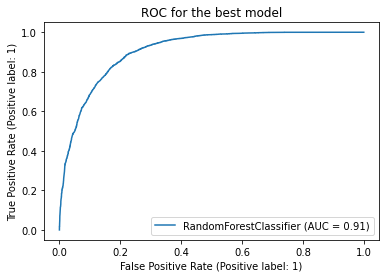

In [90]:
plot_roc_curve(census,x_test,y_test)
plt.title("ROC for the best model")
plt.show()

# Saving The Model

In [91]:
import joblib
joblib.dump(census,"Census Income Prediction.pkl")

['Census Income Prediction.pkl']

# Predicting the saved Model

In [92]:
model = joblib.load("Census Income Prediction.pkl")

prediction = model.predict(x_test)
prediction

array([1, 1, 1, ..., 1, 0, 1])

In [93]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,14302,14303,14304,14305,14306,14307,14308,14309,14310,14311
Predicted,1,1,1,1,1,1,0,0,1,1,...,1,0,1,0,0,1,0,1,0,1
Original,1,1,1,1,0,1,0,0,1,1,...,1,1,1,0,0,1,0,1,0,1
